# TRABAJO PRÁCTICO EXPERIMENTAL 

---
**PARTE I: IMPORTACIÓN Y EDA**

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Generar datos artificiales para clustering
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

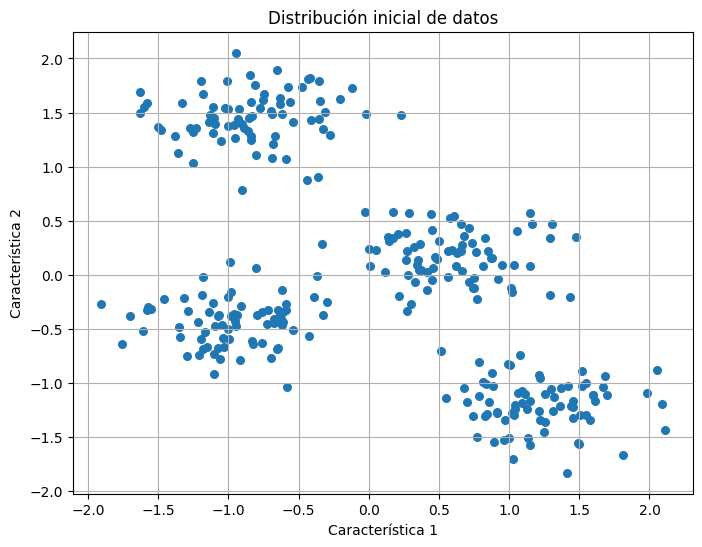

In [3]:
# Visualizar los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Distribución inicial de datos")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()

---
**PARTE II-A: K-MEANS**

---

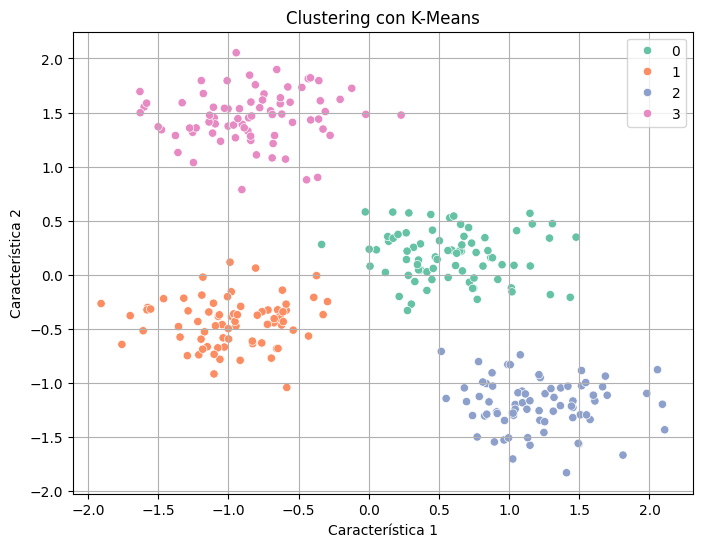

In [4]:
from sklearn.cluster import KMeans

# Crear modelo KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, palette='Set2', legend='full')
plt.title("Clustering con K-Means")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()

---
**PARTE II-B: DBSCAN**

---

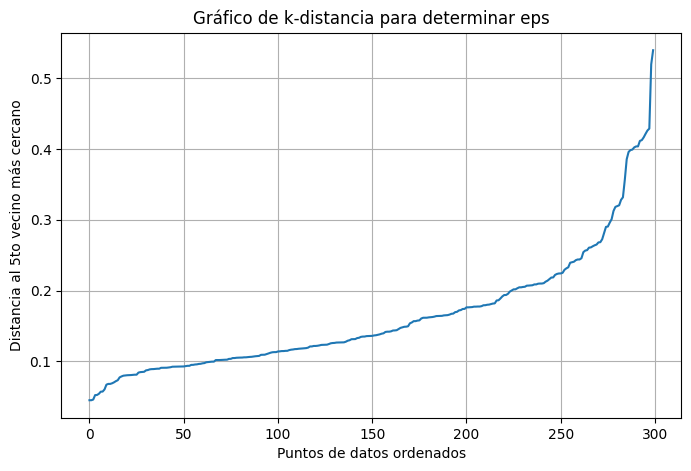

In [5]:
# Este código se agrega para obtener una visualización gráfica de las distancias al k-ésimo vecino más cercano.
# Esto permite identificar visualmente el valor óptimo de eps para DBSCAN, observando el "codo" en el gráfico.
# =============================================================================================================
from sklearn.neighbors import NearestNeighbors

# Calcular k-vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenar distancias al 5to vecino más cercano
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('Gráfico de k-distancia para determinar eps')
plt.xlabel('Puntos de datos ordenados')
plt.ylabel('Distancia al 5to vecino más cercano')
plt.grid(True)
plt.show()


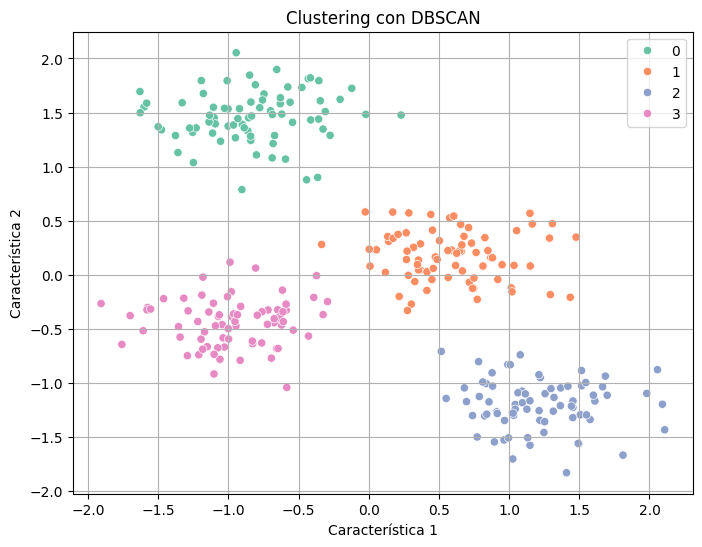

In [6]:
from sklearn.cluster import DBSCAN

# Crear modelo DBSCAN
dbscan = DBSCAN(eps=0.36, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan_labels, palette='Set2', legend='full')
plt.title("Clustering con DBSCAN")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()

---
**PARTE III: COMPARACIÓN Y CONCLUSIONES**

---

Número de clusters encontrados por K-Means: 4
Número de clusters encontrados por DBSCAN (excluyendo ruido): 4
Número de puntos detectados como ruido por DBSCAN: 0


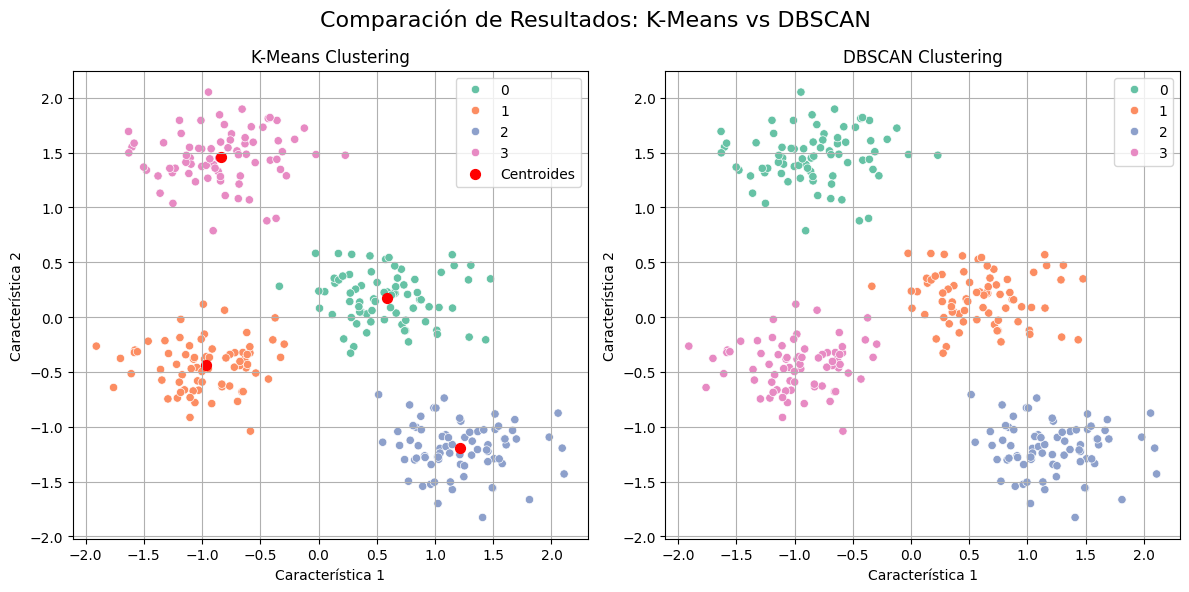

In [7]:

print("Número de clusters encontrados por K-Means:", len(np.unique(kmeans_labels)))
print("Número de clusters encontrados por DBSCAN (excluyendo ruido):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Número de puntos detectados como ruido por DBSCAN:", list(dbscan_labels).count(-1))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# K-Means
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, palette='Set2', ax=axes[0], legend='full')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='.', label='Centroides')
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Característica 1")
axes[0].set_ylabel("Característica 2")
axes[0].legend()
axes[0].grid(True)

# DBSCAN
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan_labels, palette='Set2', ax=axes[1], legend='full')
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("Característica 1")
axes[1].set_ylabel("Característica 2")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Comparación de Resultados: K-Means vs DBSCAN", fontsize=16)
plt.tight_layout()
plt.show()


---

## 📌 CONCLUSIONES

A lo largo de esta práctica se implementaron y compararon los algoritmos de agrupamiento **K-Means** y **DBSCAN**, logrando identificar correctamente los 4 clusters del conjunto de datos generado.

- **K-Means** fue eficaz al identificar los grupos, gracias a que se conocía previamente la cantidad de clusters (`n_clusters=4`). Este algoritmo resultó ser rápido y fácil de implementar.
- **DBSCAN**, por otro lado, no necesita conocer cuántos clusters hay. Sin embargo, requiere una calibración precisa de los parámetros `eps` y `min_samples` para funcionar correctamente.

### 🔍 Justificación del parámetro `eps` mediante gráfica de k-distancias

Para determinar un valor adecuado de `eps` para DBSCAN, se utilizó una **gráfica de k-distancias**, que muestra la distancia de cada punto al k-ésimo vecino más cercano (en este caso, al 5º).  
Al observar la curva, se identificó un **codo** o punto de inflexión alrededor de **`eps = 0.36`**, el cual fue elegido como valor óptimo.  
Esto permitió que DBSCAN encontrara los 4 grupos correctamente, **sin clasificar ningún punto como ruido**.

Este método es útil porque permite seleccionar `eps` de forma más fundamentada, mejorando el rendimiento del algoritmo, especialmente cuando no se conoce la estructura interna de los datos.

---

## ⚖️ VENTAJAS Y DESVENTAJAS OBSERVADAS

| Algoritmo  | Ventajas                                                                 | Desventajas                                                                 |
|------------|--------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **K-Means**| - Fácil de implementar y rápido.<br>- Funciona bien con clusters esféricos. | - Requiere conocer el número de clusters.<br>- Sensible al ruido y outliers. |
| **DBSCAN** | - No requiere especificar el número de clusters.<br>- Detecta ruido.<br>- Puede encontrar clusters con formas arbitrarias. | - Sensible a la elección de `eps` y `min_samples`.<br>- Puede fallar si los datos no tienen densidad clara. |

---

## ✅ Recomendación final

Ambos algoritmos mostraron ser efectivos en este ejercicio al aplicarse sobre datos bien estructurados.  
- **K-Means** es ideal cuando los clusters son esféricos y el número de grupos es conocido.  
- **DBSCAN** es más flexible y robusto frente a ruido y formas de clusters no lineales, siendo recomendable cuando se quiere detectar ruido o no se conoce la cantidad de agrupaciones.  
El uso de técnicas como la **gráfica de k-distancia** ayuda a mejorar la calibración de DBSCAN, garantizando resultados más precisos.
